# Imports

In [78]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [79]:
%matplotlib inline
import seaborn as sb
sb.set_style('whitegrid')

# Important Variables

In [80]:
TEAM_NAME = 'India'
PLAYER_NAME = 'Virat Kohli'
DROPFILE = 1202242

# Getting Team Match Numbers

In [81]:
# getting the file with all the matches information
address = r'C:\Users\mohitksoni\Desktop\ML-Cricket-Integration-Project\Data\INTERNATIONAL_MATCH.csv'

data = pd.read_csv(address)
data[0:10]

,Team_1,Team_1_number,Team_2,Team_2_number,Winner_team,Winner_team_number,Margin,Ground,Ground_number,Match Date,Scorecard,Match_number,Match_Type
0,Mum Indians,335978.0,Supergiants,968721.0,Supergiants,968721.0,9 wickets,Mumbai,58324.0,"Apr 9, 2016",T20,980901.0,IPL
1,KKR,335971.0,Daredevils,335975.0,KKR,335971.0,9 wickets,Kolkata,57980.0,"Apr 10, 2016",T20,980903.0,IPL
2,Kings XI,335973.0,Guj Lions,968725.0,Guj Lions,968725.0,5 wickets,Mohali,57991.0,"Apr 11, 2016",T20,980905.0,IPL
3,RCB,335970.0,Sunrisers,628333.0,RCB,335970.0,45 runs,Bengaluru,57897.0,"Apr 12, 2016",T20,980907.0,IPL
4,KKR,335971.0,Mum Indians,335978.0,Mum Indians,335978.0,6 wickets,Kolkata,57980.0,"Apr 13, 2016",T20,980909.0,IPL
5,Guj Lions,968725.0,Supergiants,968721.0,Guj Lions,968725.0,7 wickets,Rajkot,377285.0,"Apr 14, 2016",T20,980911.0,IPL
6,Daredevils,335975.0,Kings XI,335973.0,Daredevils,335975.0,8 wickets,Delhi,58040.0,"Apr 15, 2016",T20,980913.0,IPL
7,Sunrisers,628333.0,KKR,335971.0,KKR,335971.0,8 wickets,Hyderabad (Deccan),58142.0,"Apr 16, 2016",T20,980915.0,IPL
8,Mum Indians,335978.0,Guj Lions,968725.0,Guj Lions,968725.0,3 wickets,Mumbai,58324.0,"Apr 16, 2016",T20,980917.0,IPL
9,Kings XI,335973.0,Supergiants,968721.0,Kings XI,335973.0,6 wickets,Mohali,57991.0,"Apr 17, 2016",T20,980919.0,IPL


In [82]:
# getting all the matches that the Team has played in his dataset
team_matches1 = data[data['Team_1'] == TEAM_NAME]
team_matches2 = data[data['Team_2'] == TEAM_NAME]

# merging the 2 dataframes
matches = [team_matches1, team_matches2]
team_matches = pd.concat(matches)
team_matches.head()

,Team_1,Team_1_number,Team_2,Team_2_number,Winner_team,Winner_team_number,Margin,Ground,Ground_number,Match Date,Scorecard,Match_number,Match_Type
646,India,6.0,Bangladesh,25.0,India,6.0,208 runs,Hyderabad (Deccan),58142.0,"Feb 9-13, 2017",Test # 2249,1041761.0,TEST_MATCH
647,India,6.0,Australia,2.0,Australia,2.0,333 runs,Pune,545380.0,"Feb 23-25, 2017",Test # 2250,1062573.0,TEST_MATCH
648,India,6.0,Australia,2.0,India,6.0,75 runs,Bengaluru,57897.0,"Mar 4-7, 2017",Test # 2251,1062574.0,TEST_MATCH
653,India,6.0,Australia,2.0,drawn,NaN,NaN,Ranchi,485865.0,"Mar 16-20, 2017",Test # 2256,1062575.0,TEST_MATCH
655,India,6.0,Australia,2.0,India,6.0,8 wickets,Dharamsala,58056.0,"Mar 25-28, 2017",Test # 2258,1062576.0,TEST_MATCH


In [83]:
# getting the match numbers because that is what we need to find out specific files for specific matches
team_match_nums = team_matches['Match_number']
team_match_nums.head() # is a Series (not a DataFrame)

646    1041761.0
647    1062573.0
648    1062574.0
653    1062575.0
655    1062576.0
Name: Match_number, dtype: float64

# Revision of Data

In [84]:
# Casting all the match numbers to ints (not floats) so it's easy to work with the numbers
team_match_nums = team_match_nums.astype(int)

In [85]:
# Removing duplicates if there are any (there are none)
team_match_nums = team_match_nums.drop_duplicates()

In [86]:
# Removing any N/A values if there are any (there are none)
team_match_nums = team_match_nums.dropna()

In [87]:
index_specific = team_match_nums[team_match_nums == DROPFILE].index

# Removing 1202242 from match numbers because it doesn't have a corresponding match
team_match_nums = team_match_nums.drop(index = index_specific)

In [88]:
# changing the index of team_match_nums Series to start from 0
team_match_nums.index = np.arange(len(team_match_nums))
team_match_nums.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            184, 185, 186, 187, 188, 189, 190, 191, 192, 193],
           dtype='int64', length=194)

# Getting All Balls played by Specific Player from Team Matches

In [89]:
player_balls = pd.DataFrame()

# Looping through the matches
# Getting all balls played by the player from each match and appending that to player_balls dataframe
for match_num in team_match_nums:
    match_address = r'C:\Users\mohitksoni\Desktop\ML-Cricket-Integration-Project\Data\COMMENTARY_INTL_MATCH\COMMENTARY_INTL_MATCH\{}_COMMENTARY.csv'.format(match_num)
    match = pd.read_csv(match_address)
    match_player_balls = match[match['Batsman_name'] == PLAYER_NAME]
    player_balls = player_balls.append(match_player_balls)

In [90]:
# removing the runouts from the dataframe
runout_index = player_balls[player_balls['Dismissal_type'] == 'run out'].index
player_balls = player_balls.drop(index = runout_index)

In [91]:
player_balls['PlayType_description'].unique()

array(['four', 'no run', 'run', 'leg bye', 'out', 'six', 'wide', 'bye',
       'no ball'], dtype=object)

In [92]:
# Nan is one unique value because of balls when a person doesn't get out
player_balls['Dismissal_type'].unique()

array([nan, 'leg before wicket', 'caught', 'bowled', 'stumped'],
      dtype=object)

In [93]:
# Changing the index of player_balls so that it sequentially starts from 0
player_balls.index = np.arange(len(player_balls))
player_balls.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11125, 11126, 11127, 11128, 11129, 11130, 11131, 11132, 11133,
            11134],
           dtype='int64', length=11135)

# Separating Wicket and Non-Wicket Data

In [94]:
# Wicket data
# Length = 148
player_wicket = player_balls[player_balls['PlayType_description'] == 'out']
player_wicket.head()

,PlayType_description,Batting_Team_id,Batting_Team_name,Bowling_Team_id,Bowling_Team_name,Innings,Total_Runs_on_delivery,Commentary,Commentary_short,Score,...,Innings_run_rate,Innings_byes,Innings_balls,Innings_no_balls,Innings_wickets,Innings_leg_byes,Innings_session,Innings_day,Innings_wides,Innings_runs
244,out,6,India,25,Bangladesh,1st innings,0,"he's lbw, Kohli walks off. Doesn't bother revi...","Taijul Islam to Kohli, OUT",495/5,...,3.95,0,751,0,5,0,2,2,0,495
284,out,6,India,25,Bangladesh,3rd innings,0,"down the track, and this time he's gone. Gets ...","Shakib Al Hasan to Kohli, OUT",0,...,5.34,0,101,0,3,0,2,4,0,90
286,out,6,India,2,Australia,2nd innings,0,"he's sucked him in! Starc, you beauty. The mos...","Starc to Kohli, OUT",0,...,3.0,0,88,0,3,0,1,2,0,44
323,out,6,India,2,Australia,4th innings,0,bowled 'im. Kohli has left a straight one. Was...,"O'Keefe to Kohli, OUT",0,...,2.87,0,98,0,3,0,2,3,0,47
339,out,6,India,2,Australia,1st innings,0,what has Kohli done here? Out twice in a row w...,"Lyon to Kohli, OUT",88/3,...,2.6,0,203,0,3,0,2,1,0,88


In [95]:
# Non-wicket data
player_nonwicket = player_balls[player_balls['PlayType_description'] != 'out']
player_nonwicket.head()

,PlayType_description,Batting_Team_id,Batting_Team_name,Bowling_Team_id,Bowling_Team_name,Innings,Total_Runs_on_delivery,Commentary,Commentary_short,Score,...,Innings_run_rate,Innings_byes,Innings_balls,Innings_no_balls,Innings_wickets,Innings_leg_byes,Innings_session,Innings_day,Innings_wides,Innings_runs
0,four,6,India,25,Bangladesh,1st innings,4,a gift to the Indian captain for his hospitali...,"Mehidy Hasan Miraz to Kohli, FOUR runs",184/2,...,3.6,0,306,0,2,0,2,1,0,184
1,no run,6,India,25,Bangladesh,1st innings,0,"fuller delivery on middle and off, Kohli gets ...","Taskin Ahmed to Kohli, no run",189/2,...,3.66,0,309,0,2,0,2,1,0,189
2,four,6,India,25,Bangladesh,1st innings,4,clatters it past the bowler's left. Not entire...,"Taskin Ahmed to Kohli, FOUR runs",193/2,...,3.73,0,310,0,2,0,2,1,0,193
3,no run,6,India,25,Bangladesh,1st innings,0,"good length ball outside off, lunges forward t...","Taskin Ahmed to Kohli, no run",193/2,...,3.72,0,311,0,2,0,2,1,0,193
4,no run,6,India,25,Bangladesh,1st innings,0,"back of a length on off stump, Kohli covers th...","Taskin Ahmed to Kohli, no run",193/2,...,3.71,0,312,0,2,0,2,1,0,193


In [96]:
# Changing the index of  player_wicket so it starts from 0
player_wicket.index = np.arange(len(player_wicket))
player_wicket.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            138, 139, 140, 141, 142, 143, 144, 145, 146, 147],
           dtype='int64', length=148)

In [97]:
# Changing the index of  player_nonwicket so it starts from 0
player_nonwicket.index = np.arange(len(player_nonwicket))
player_nonwicket.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10977, 10978, 10979, 10980, 10981, 10982, 10983, 10984, 10985,
            10986],
           dtype='int64', length=10987)

# Data Exploration

<AxesSubplot:xlabel='Batsman_runs', ylabel='Bowling_Team_name'>

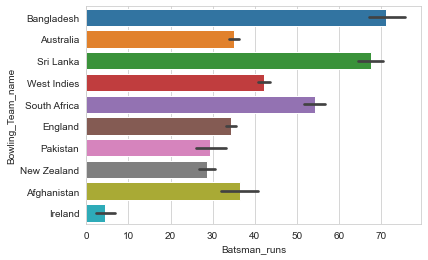

In [98]:
sb.barplot(x = 'Batsman_runs', y = 'Bowling_Team_name', data = player_balls)

<AxesSubplot:xlabel='Dismissal_type', ylabel='Batsman_runs'>

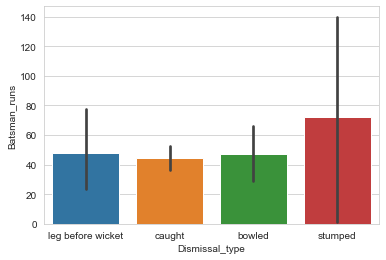

In [99]:
sb.barplot(x = 'Dismissal_type', y = 'Batsman_runs', data = player_balls)

<AxesSubplot:xlabel='Innings_runs', ylabel='Batsman_runs'>

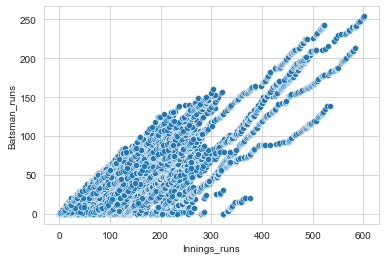

In [100]:
sb.scatterplot(x = 'Innings_runs', y = 'Batsman_runs', data = player_balls)

<AxesSubplot:xlabel='Batsman_runs'>

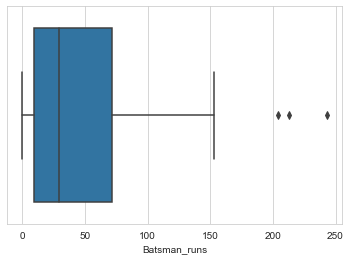

In [101]:
sb.boxplot(x = 'Batsman_runs', data = player_wicket)

# Retrieving Features

In [102]:
# NOTE: Commentary is missing sometimes

# Features I would like to get: 
#   - Line of the Ball
#   - Length of the Ball
#   - Speed of the Ball
#   - Turn/swing of the ball
#   - How the person got out
#   - If he got out caught, where did he get out

In [277]:
comm = player_balls['Commentary'].iloc[1].lower()
print(comm)

def extractLine(comm):
    if (comm.__contains__('middle stump')): print('Line: Middle Stump')
    elif (comm.__contains__('leg stump')): print('Line: Leg stump')
    elif (comm.__contains__('off stump')): print('Line: Off stump')
    elif (comm.__contains__('middle and off')): print('Line: Middle & Off')
    elif (comm.__contains__('aimed at the batsman')): print('Line: Middle stump')

    elif (comm.__contains__('wide')): print('Line: Wide')
    elif (comm.__contains__('straight')): print('Line: Middle stump')
    elif (comm.__contains__('outside off')): print('Line: Off')
    elif (comm.__contains__('middle')): print('Line: Middle stump')
    elif (comm.__contains__(' off ')): print('Line: Off')
    else: print('Line: N/A')

def extractLength(comm):
    if (comm.__contains__('full length')): print('Length: Full')
    elif (comm.__contains__('half-volley')): print('Length: Full')
    elif (comm.__contains__('short length')): print('Length: Short')
    elif (comm.__contains__('good length')): print('Length: Good')
    elif (comm.__contains__('tossed up')): print('Length: Full')
    elif (comm.__contains__('tosses it up')): print('Length: Full')
    elif (comm.__contains__('flighted')): print('Length: Full')
    elif (comm.__contains__('bouncer')): print('Length: Short')

    elif (comm.__contains__('full')): print('Length: Full')
    elif (comm.__contains__('short')): print('Length: Short')
    elif (comm.__contains__('good')): print('Length: Good')
    elif (comm.__contains__('drive')): print('Length: Full')

    elif (comm.__contains__('length')): print('Length: Good')
    else: print('Length: N/A')

def extractLocation(comm):
    if (comm.__contains__('deep midwicket')): print('Location: Deep Midwicket')
    elif (comm.__contains__('midwicket')): print('Location: Midwicket')
    elif (comm.__contains__('first slip')): print('Location: First slip')
    elif (comm.__contains__('second slip')): print('Location: Second slip')
    elif (comm.__contains__('gully')): print('Location: Gully')
    elif (comm.__contains__('short fine leg')): print('Location: Short Fine Leg')
    elif (comm.__contains__('fine leg')): print('Location: Fine Leg')
    elif (comm.__contains__('deep point')): print('Location: Deep Point')
    elif (comm.__contains__('point')): print('Location: Point')
    elif (comm.__contains__('long-off')): print('Location: Long-off')
    elif (comm.__contains__('mid-on')): print('Location: Mid-On')
    elif (comm.__contains__('mid-off')): print('Location: Mid-Off')
    elif (comm.__contains__('cover')): print('Location: Cover')
    elif (comm.__contains__('sweeper')): print('Location: Sweeper')
    elif (comm.__contains__('deep square leg')): print('Location: Deep Square Leg')
    elif (comm.__contains__('square leg')): print('Location: Square Leg')
    elif (comm.__contains__('short third man')): print('Location: Short Third Man')
    elif (comm.__contains__('third man')): print('Location: Third Man')
    elif (comm.__contains__('long leg')): print('Location: Long Leg')
    
    elif (comm.__contains__('wicketkeeper')): print('Location: Wicketkeeper')
    elif (comm.__contains__('no shot offered')): print('Location: Wicketkeeper')
    elif (comm.__contains__('leave')): print('Location: Wicketkeeper')
    elif (comm.__contains__('left')): print('Location: Wicketkeeper')

    elif (comm.__contains__('defend')): print('Location: Close')
    else: print('Location: N/A')

def extractSpeed(comm):
    #### Speed of Ball
    # Get the bowler and find out their average speed based on another database
    # If "quicker" is in the commentary, add some amount to the speed
    # If "slower" is in the commentary, subtract some amount from the speed
    print('Speed: N/A')

def extractBounce(comm):
    if (comm.__contains__('keeps low')): print('Bounce: Low')
    else: print('Bounce: N/A')

def extractInfo(comm):
    extractLine(comm)
    extractLength(comm)
    extractLocation(comm)
    extractSpeed(comm)
    extractBounce(comm)

extractInfo(comm)

fuller delivery on middle and off, kohli gets across to it and flicks towards midwicket
Line: Middle & Off
Length: Full
Location: Midwicket
Speed: N/A
Bounce: N/A
